<a href="https://colab.research.google.com/github/rmogi/HousePrice/blob/branch-mogi/HousePrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'sample_submission.csv': b'Id,SalePrice\n1461,169277.0524984\n1462,187758.393988768\n1463,183583.683569555\n1464,179317.47751083\n1465,150730.079976501\n1466,177150.989247307\n1467,172070.659229164\n1468,175110.956519547\n1469,162011.698831665\n1470,160726.247831419\n1471,157933.279456005\n1472,145291.245020389\n1473,159672.017631819\n1474,164167.518301885\n1475,150891.638244053\n1476,179460.96518734\n1477,185034.62891405\n1478,182352.192644656\n1479,183053.458213802\n1480,187823.339254278\n1481,186544.114327568\n1482,158230.77520516\n1483,190552.829321091\n1484,147183.67487199\n1485,185855.300905493\n1486,174350.470676986\n1487,201740.620690863\n1488,162986.378895754\n1489,162330.199085679\n1490,165845.938616539\n1491,180929.622876974\n1492,163481.501519718\n1493,187798.076714233\n1494,198822.198942566\n1495,194868.409899858\n1496,152605.298564403\n1497,147797.702836811\n1498,150521.96899297\n1499,146991.630153739\n1500,150306.307814534\n1501,151164.372534604\n1502,151133.706960953\n

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [29]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [30]:
# トレーニングデータの確認
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
# テストデータの確認
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
# トレーニングデータの変数の確認
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [33]:
# テストデータの変数の確認
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [34]:
# 目的変数である家の価格の要約統計量
train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

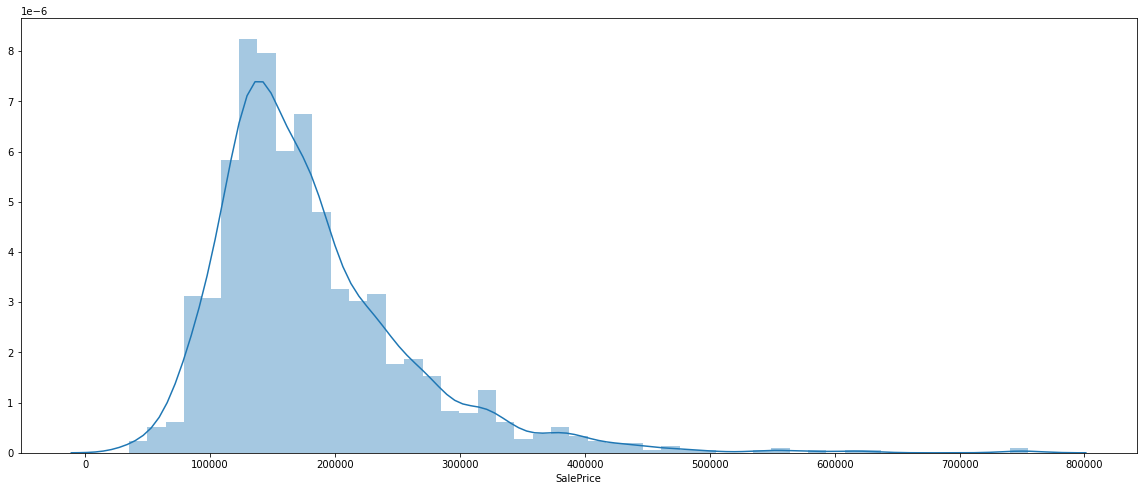

In [35]:
# 家の価格のヒストグラム
plt.figure(figsize=(20, 8), facecolor="w")
sns.distplot(train["SalePrice"])

In [36]:
# 歪度と尖度の計算
print("歪度: %f" % train["SalePrice"].skew())
print("尖度: %f" % train["SalePrice"].kurt())

歪度: 1.882876
尖度: 6.536282


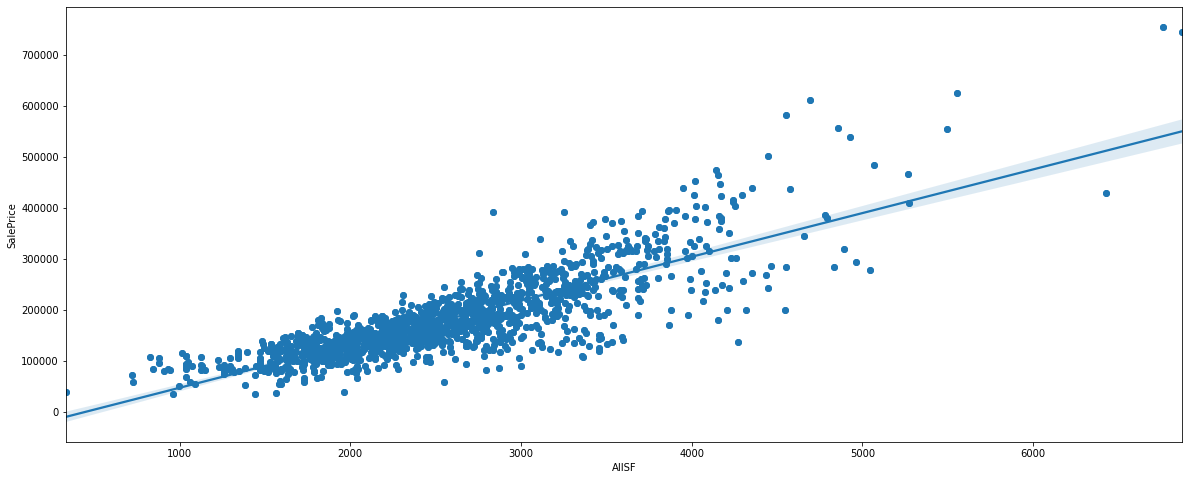

In [40]:
"""
1stFlrSF: 1階の広さ
2ndFlrSF: 2階の広さ
TotalBsmtSF: 地下の広さ
"""
# 物件の広さを合計した変数の作成
train["AllSF"] = train["1stFlrSF"] + train["2ndFlrSF"] + train["TotalBsmtSF"]
test["AllSF"] = test["1stFlrSF"] + test["2ndFlrSF"] + test["TotalBsmtSF"]

# 物件の広さと物件価格の散布図を作成
plt.figure(figsize=(20, 8), facecolor="w")
plt.scatter(train["AllSF"], train["SalePrice"])
plt.xlabel("AllSF")
plt.ylabel("SalePrice")
sns.regplot(x=train.AllSF, y=train.SalePrice)

若干外れ値はあるが、相関はしてる

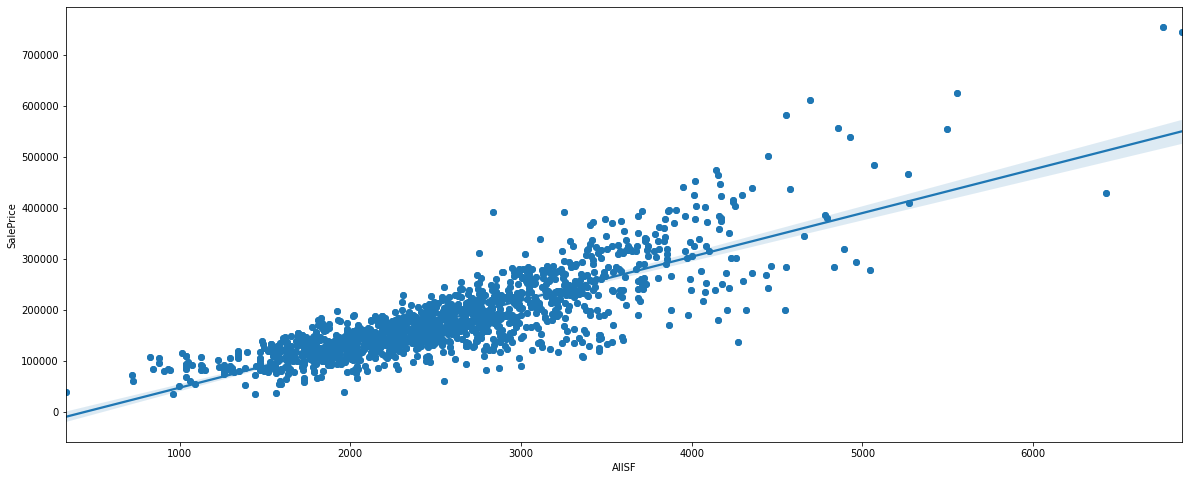

In [39]:
# 外れ値を除外
train = train.drop(train[(train["AllSF"]>7500) & (train["SalePrice"]<300000)].index)

# 物件の広さと物件価格の散布図を作成
plt.figure(figsize=(20, 8), facecolor="w")
plt.scatter(train["AllSF"], train["SalePrice"])
plt.xlabel("AllSF")
plt.ylabel("SalePrice")
sns.regplot(x=train.AllSF, y=train.SalePrice)

Text(0, 0.5, 'SalePrice')

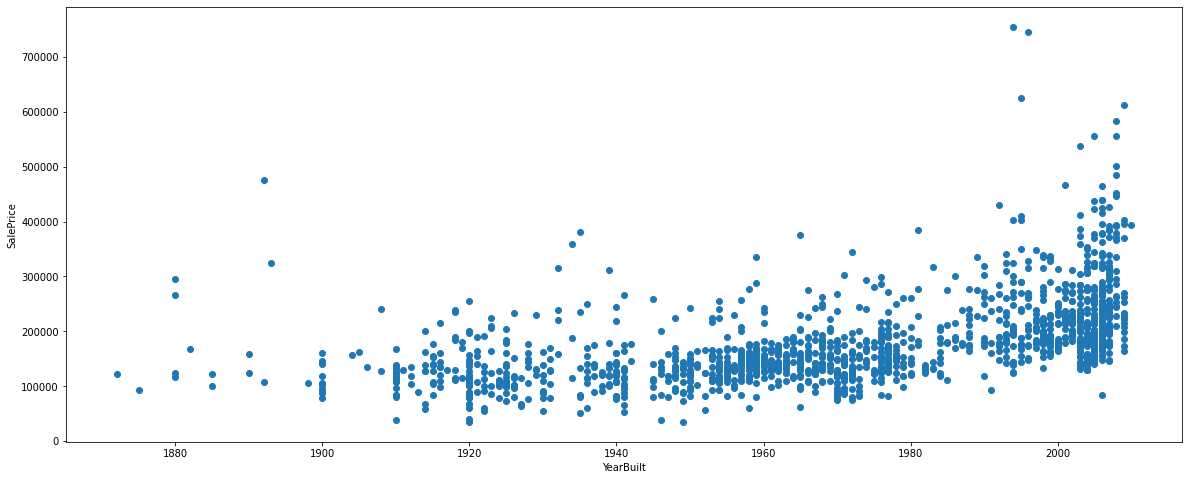

In [23]:
# 築年数と物件価格の散布図
plt.figure(figsize=(20, 8), facecolor="w")
plt.scatter(train["YearBuilt"], train["SalePrice"])
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")

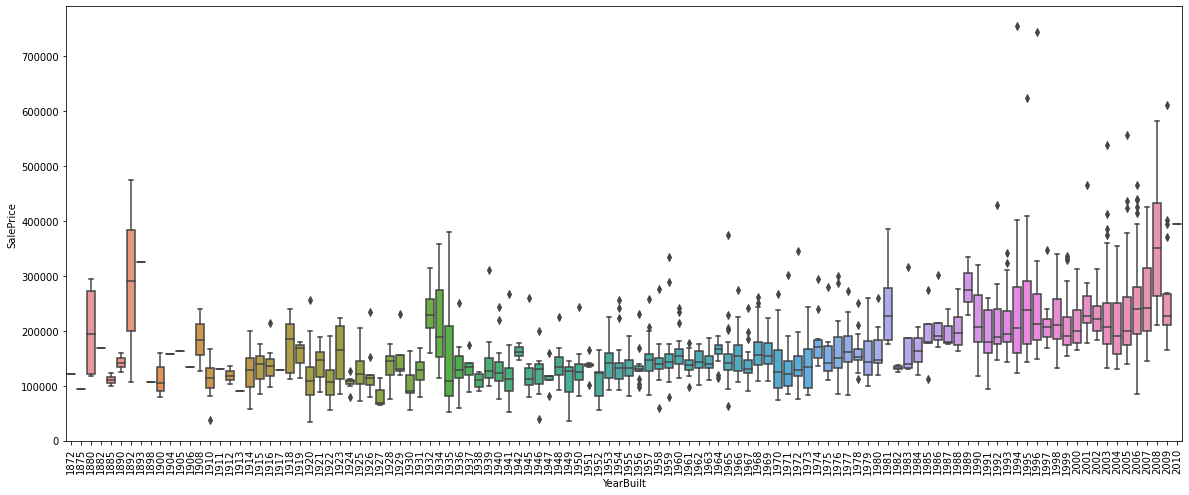

In [26]:
data = pd.concat([train["YearBuilt"], train["SalePrice"]], axis=1)

plt.figure(figsize=(20, 8), facecolor="w")
plt.xticks(rotation="90")
sns.boxplot(x="YearBuilt", y="SalePrice", data=data)

築年数が新しいほど部県価格が高い傾向がありそう。正直微妙

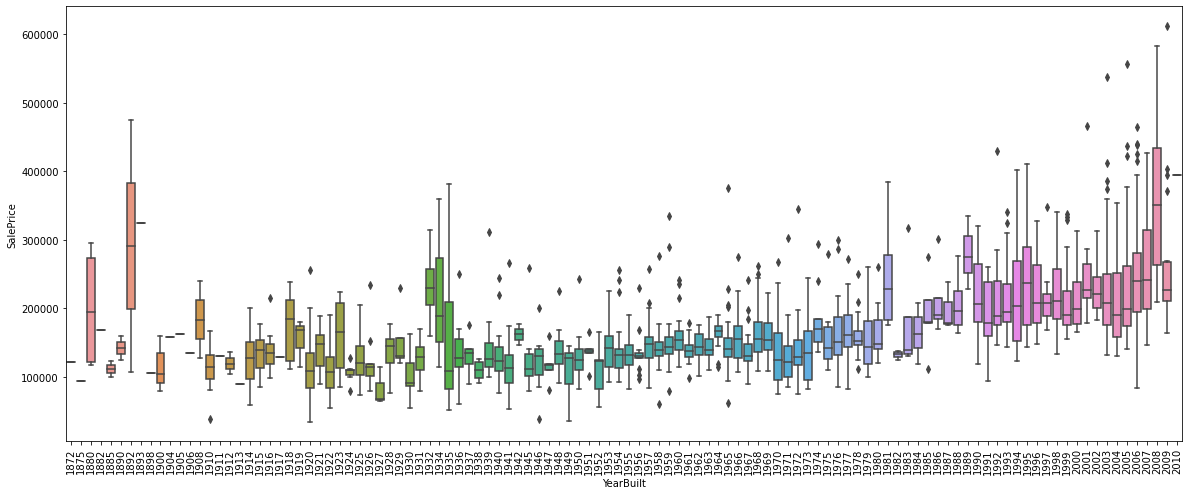

In [42]:
# 外れ値を除外
train = train.drop(train[(train["YearBuilt"]<2000) & (train["SalePrice"]>600000)].index)

# グラフの描画
data = pd.concat([train["YearBuilt"], train["SalePrice"]], axis=1)

plt.figure(figsize=(20, 8), facecolor="w")
plt.xticks(rotation="90")
sns.boxplot(x="YearBuilt", y="SalePrice", data=data)

Text(0, 0.5, 'SalePrice')

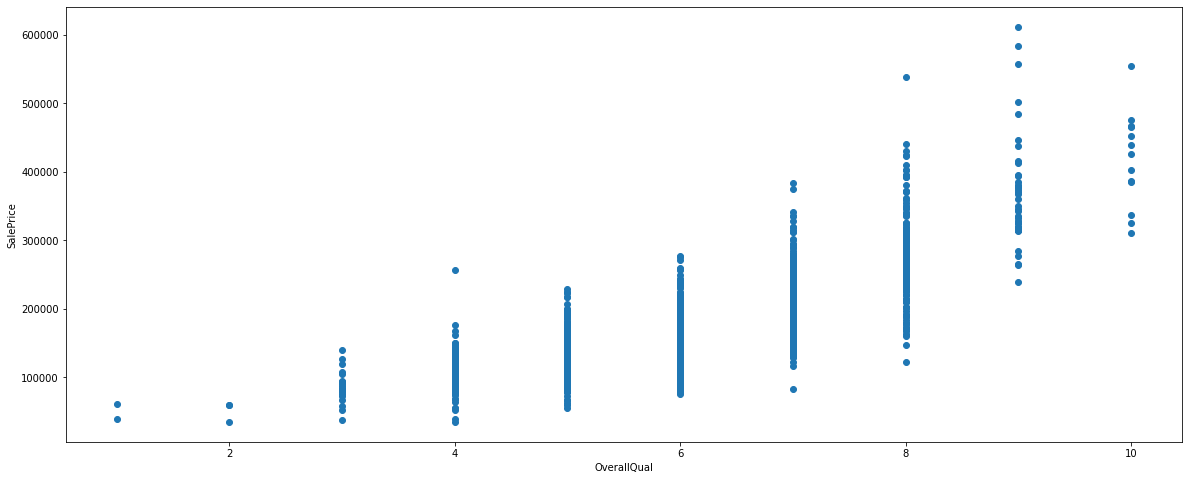

In [43]:
# 家の材料・完成度と物件価格の散布図を作成
plt.figure(figsize=(20, 8), facecolor="w")
plt.scatter(train["OverallQual"], train["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

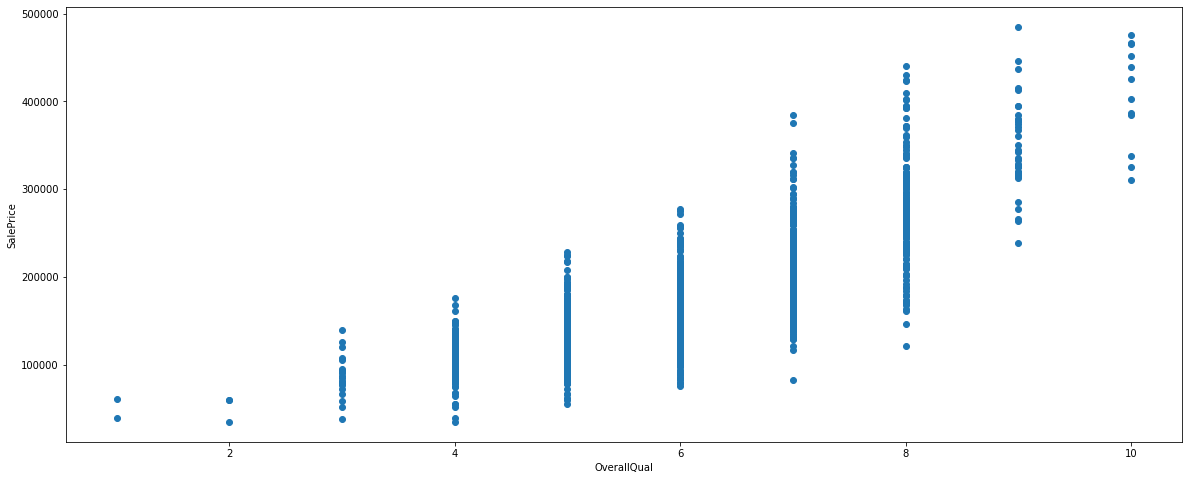

In [49]:
# 外れ値を除外
train = train.drop(train[(train["OverallQual"]<5) & (train["SalePrice"]>200000)].index)
train = train.drop(train[(train["OverallQual"]<=10) & (train["SalePrice"]>500000)].index)

# グラフを描画
plt.figure(figsize=(20, 8), facecolor="w")
plt.scatter(train["OverallQual"], train["SalePrice"])
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")

In [50]:
# 学習データを目的変数とそれ以外に分ける
train_x = train.drop("SalePrice", axis=1)
train_y = train["SalePrice"]

In [51]:
# 学習データとテストデータを統合
all_data = pd.concat([train_x, test])

In [53]:
# IDのカラムは不必要なので別に経数に格納
train_ID = train["Id"]
test_ID = test["Id"]

all_data.drop("Id", axis=1, inplace=True)

In [54]:
# それぞれのデータサイズの確認
print("train_x:" + str(train_x.shape))
print("train_y:" + str(train_y.shape))
print("test:" + str(test.shape))
print("all_data:" + str(all_data.shape))

train_x:(1448, 81)
train_y:(1448,)
test:(1459, 81)
all_data:(2907, 80)


In [61]:
# データの欠損値を確認
all_data_d = all_data.isnull().sum()[all_data.isnull().sum()>0].sort_values(ascending=False)
all_data_d

PoolQC          2899
MiscFeature     2802
Alley           2709
Fence           2337
FireplaceQu     1420
LotFrontage      485
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
Exterior1st        1
Exterior2nd        1
AllSF              1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
KitchenQual        1
GarageCars         1
GarageArea         1
Electrical         1
dtype: int64

In [60]:
all_data_x.shape

(35,)

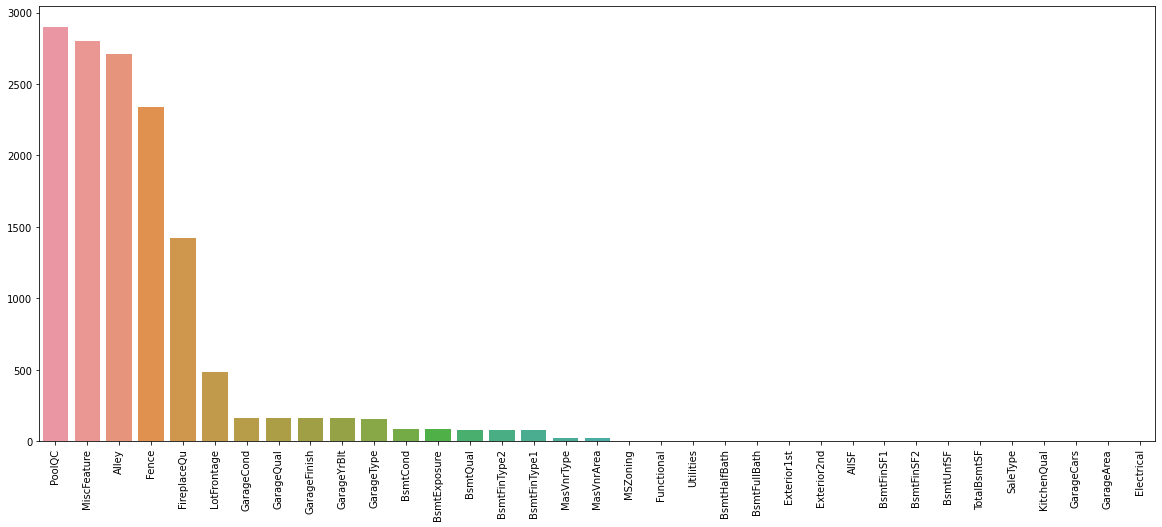

In [62]:
# 欠損値の数をグラフ化
plt.figure(figsize=(20, 8), facecolor="w")
plt.xticks(rotation="90")
sns.barplot(x=all_data_d.index, y=all_data_d)

PoolQC: Pool quality

備え付けられているプールの質を表す。プールがない場合にはNAとなる。

MiscFeature: Miscellaneous feature not covered in other categories

そのほかの備え付けられている設備を表す。エレベータやテニスコートなど。特にない場合はNAとなる。

Alley: Type of alley access to property

物件にアクセスするための道の種類（砂利なのか舗装されているのか）を表す。該当しない場合はNAとなる。

Fence: Fence quality
フェンスの質を表す。フェンスがない場合はNAとなる。

FireplaceQu: Fireplace quality

暖炉の品質を表す。暖炉がない場合はNAとなる。

LotFrontage: Linear feet of street connected to property

物件に連接した道路の長さ。

MSSubClass: ldentifies the type of dwelling involved in the sale

住宅の種類を表す。数値はどの種類に当てはまるかを表すだけで大きさや順序に意味はない。

YrSold: Year Sold(YYYY)

販売年

MoSold: Month Sold(MM)

販売月

In [64]:
# 欠損値があるカラムをリスト化
d_col_list = all_data.isnull().sum()[all_data.isnull().sum()>0].index.tolist()

# 欠損があるカラムのデータ型を確認
all_data[d_col_list].dtypes.sort_values()

AllSF           float64
LotFrontage     float64
BsmtFullBath    float64
TotalBsmtSF     float64
BsmtUnfSF       float64
BsmtFinSF2      float64
MasVnrArea      float64
GarageArea      float64
GarageCars      float64
BsmtHalfBath    float64
GarageYrBlt     float64
BsmtFinSF1      float64
FireplaceQu      object
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
GarageType       object
Functional       object
MSZoning         object
SaleType         object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Exterior2nd      object
Exterior1st      object
Utilities        object
Alley            object
KitchenQual      object
Electrical       object
dtype: object

In [69]:
# 隣接した道路の長さ(LotFrontage)の欠損値の補完
all_data["lotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# 欠損値が存在するかつfloat型のリストを作成
float_list = all_data[d_col_list].dtypes[all_data[d_col_list].dtypes == "float64"].index.tolist()

# 欠損値が存在するかつobject型のリストを作成
obj_list = all_data[d_col_list].dtypes[all_data[d_col_list].dtypes == "object"].index.tolist()

# float型の場合は欠損値を0で置換
all_data[float_list] = all_data[float_list].fillna(0)

# object型の場合は欠損値を"None"で置換
all_data[obj_list] = all_data[obj_list].fillna("None")

# 欠損値が全て置換できているかを確認
all_data.isnull().sum()[all_data.isnull().sum() > 0]

Series([], dtype: int64)

In [73]:
# カテゴリ変数に変換する
all_data["MSSubClass"] = all_data["MSSubClass"].apply(str)
all_data["YrSold"] = all_data["YrSold"].astype(str)
all_data["MoSold"] = all_data["MoSold"].astype(str)

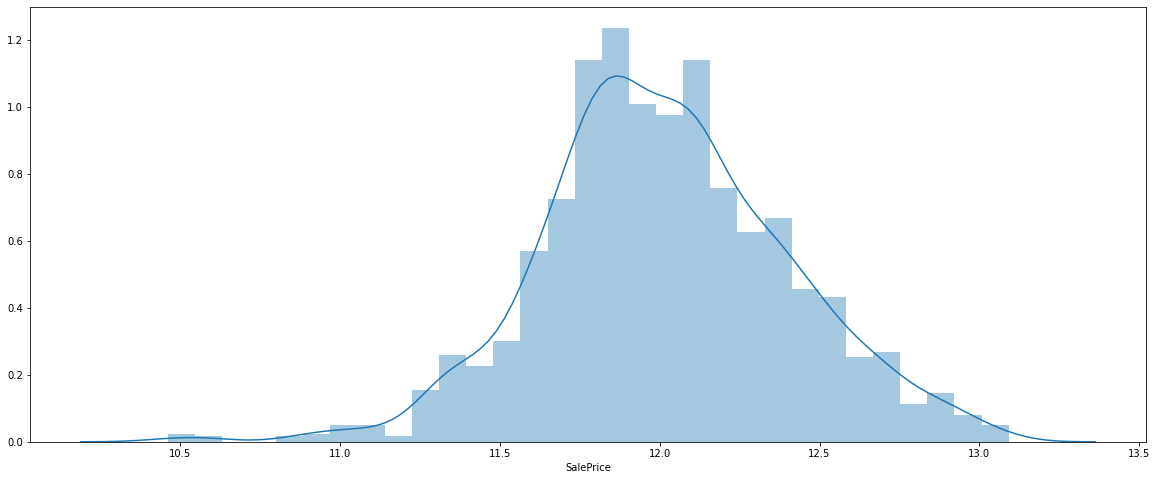

In [74]:
# 目的変数の対数log(x+1)をとる
train_y = np.log1p(train_y)

# 分布を可視化
plt.figure(figsize=(20, 8))
sns.distplot(train_y)